## Visualizing the Gender Gap in College Degrees

In this project, I will analyze trends over time in the percentage of STEM degrees awarded to women. The gender gap in STEM degrees is often reported in the news, but some people contest as to whether it actually exists. I will attempt to determine whether there ever was a gap and if the gap still exists today.

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website, which is the data set I will be using here.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

First, I will create custom colors that are colorblind sensitive.

In [2]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

Next, I will separate the 17 different degrees contained in the dataset into STEM, liberal arts, and other.

In [3]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

First, I will start by creating line charts that show the percentage of women and the percentage of men who were granted degrees in each field over 1970 - 2012. I will put all of the degrees that are in the same category (STEM, liberal arts, or other) in the same column of plots. I will also add a title to each plot stating the degree name.

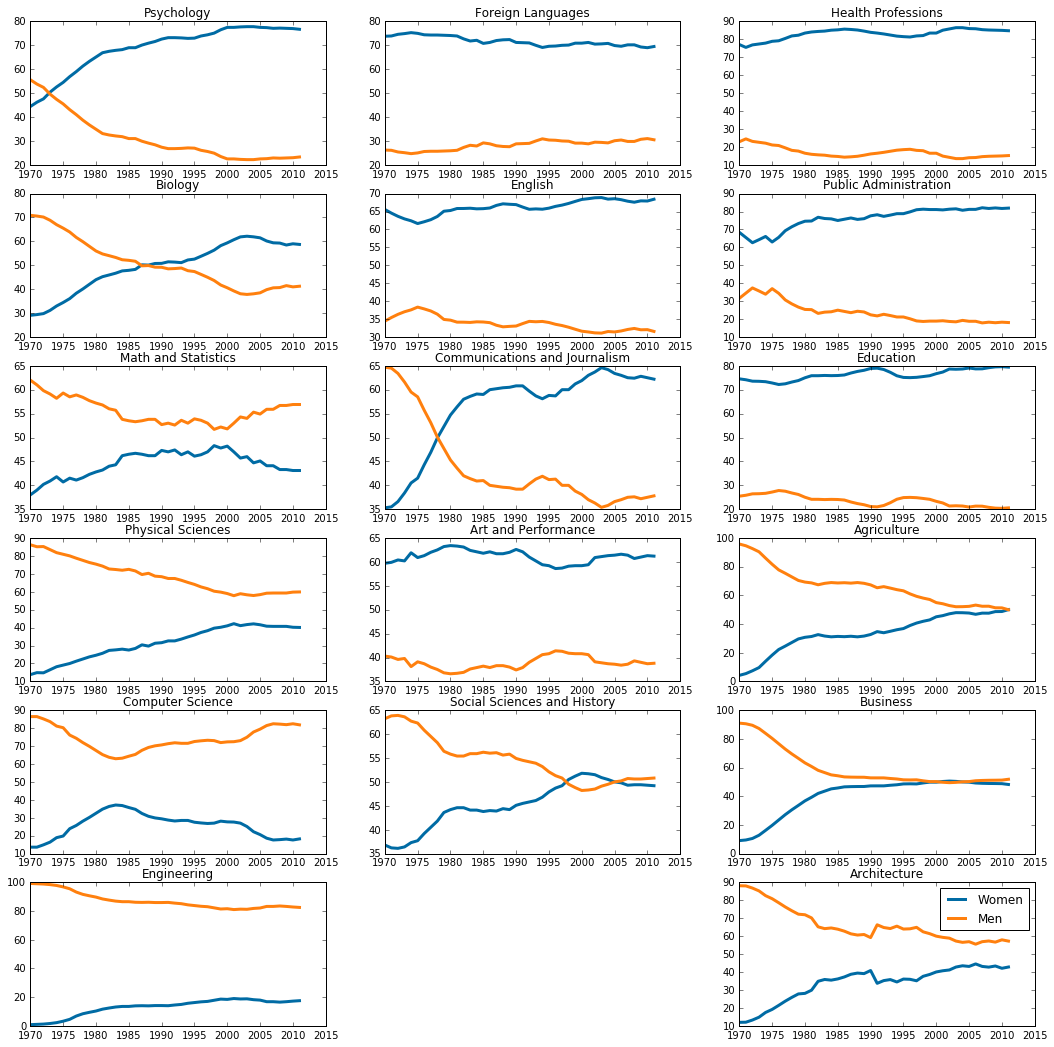

In [4]:
fig = plt.figure(figsize=(18, 18))

for sp in range(0,18,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int(sp/3)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(stem_cats[index])
for sp in range(1,15,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int((sp-1)/3)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(lib_arts_cats[index])
for sp in range(2,18,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int((sp-2)/3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(other_cats[index])
plt.legend()
plt.show()

To help clean up the plots and increase the data-ink ratio, I will remove the spines on all of the plots (borders on each side of the plot), as well as remove the ticks on all sides of the plot. In addition, I need to make sure that the axes have the same data range across all plots so that it is easier to compare visually (for instance, engineering ranges from 0-100% on the y-axis, but social sciences ranges from 35-65%, so it makes social sciences appear to have a larger initial gap than it actually does).

Also, I will get rid of the legend and instead label only the top and bottom plots in each column with which line represents women and which line represents men.

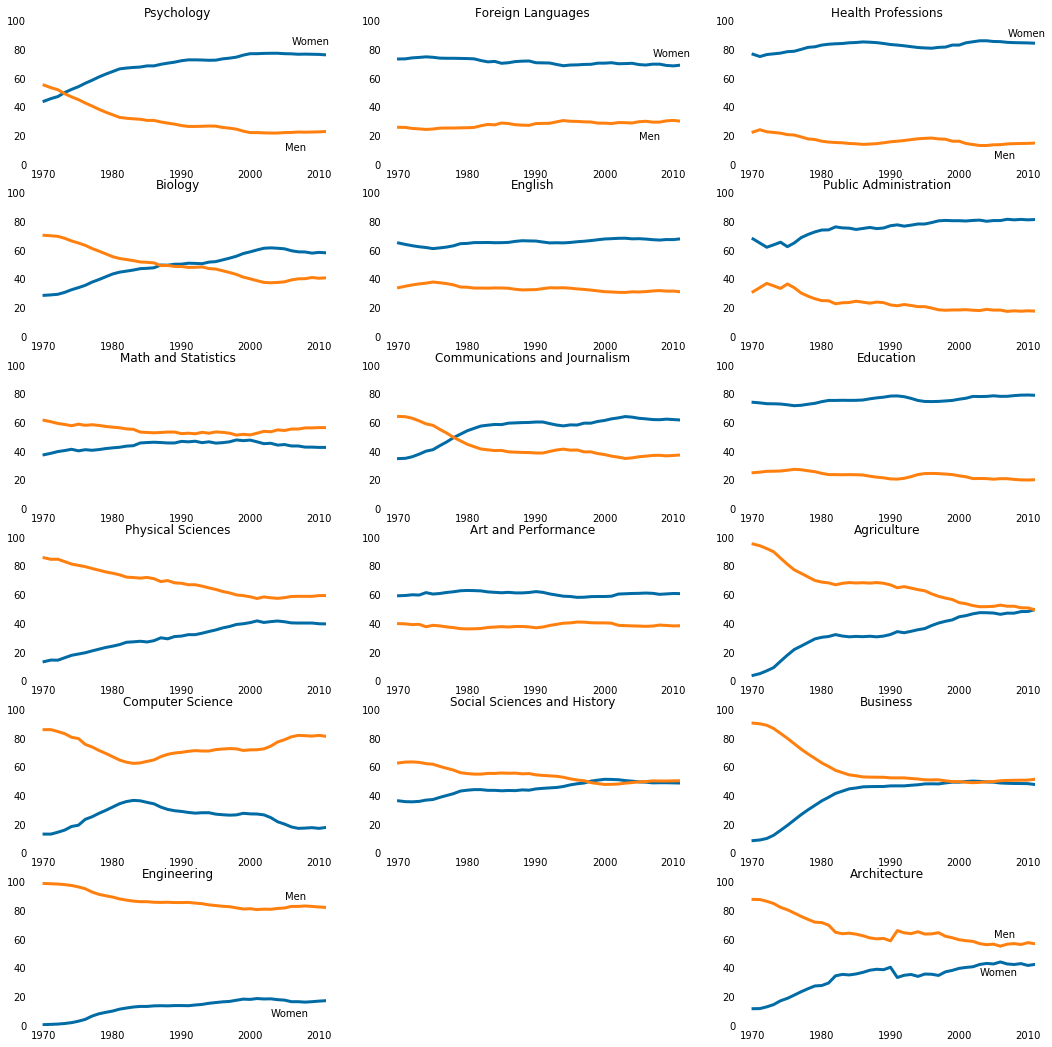

In [5]:
fig = plt.figure(figsize=(18, 18))

for sp in range(0,18,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int(sp/3)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(stem_cats[index])
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if index == 0:
        ax.text(2006, 84, 'Women')
        ax.text(2005, 10, 'Men')
    elif index == 5:
        ax.text(2005, 88, 'Men')
        ax.text(2003, 7, 'Women')

for sp in range(1,15,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int((sp-1)/3)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(lib_arts_cats[index])
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if index == 0:
        ax.text(2007, 76, 'Women')
        ax.text(2005, 18, 'Men')

for sp in range(2,18,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int((sp-2)/3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(other_cats[index])
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if index == 0:
        ax.text(2007, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 35, 'Women')
plt.show()

The data-ink ratio is much better in this plot. To improve even further, I will get rid of the x-axis labels on all plots except the bottom plot in each column.

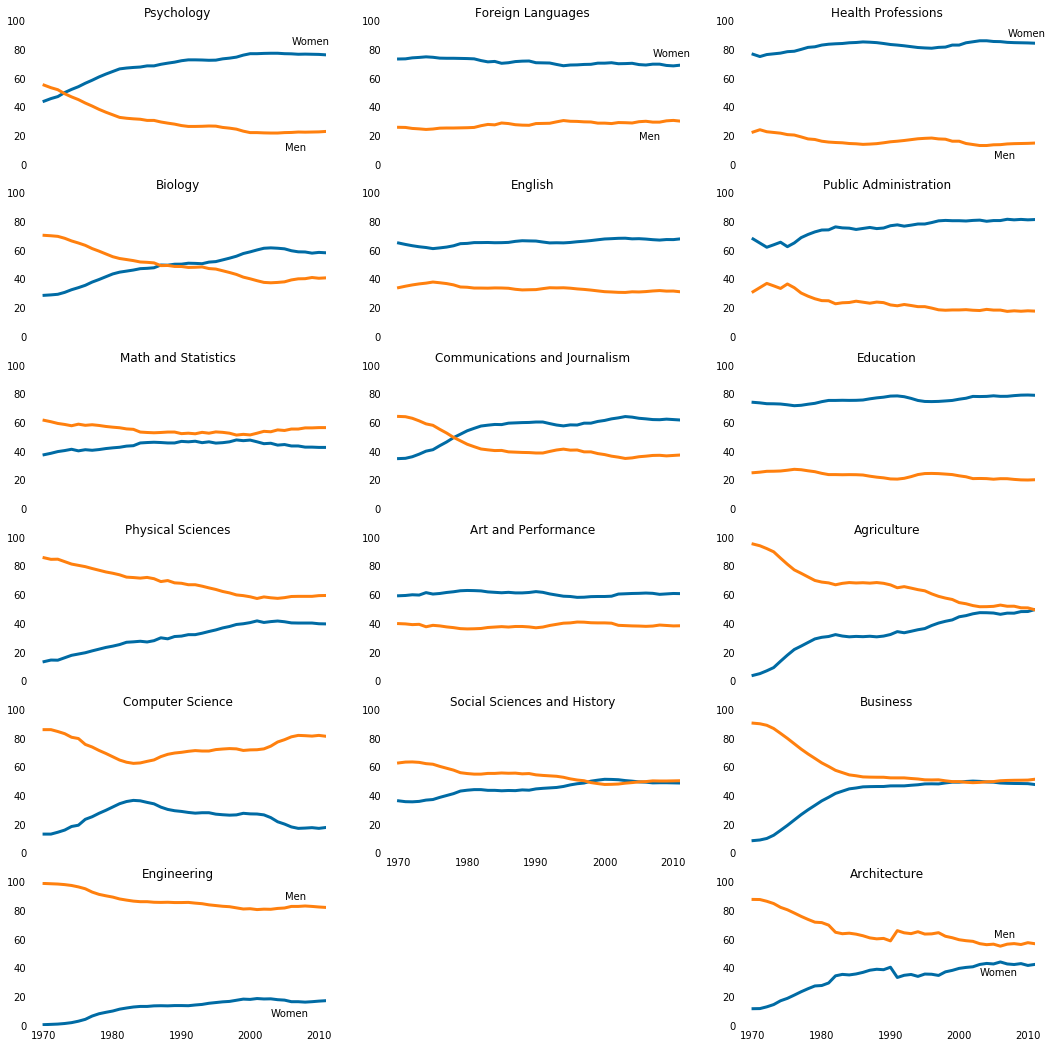

In [11]:
fig = plt.figure(figsize=(18, 18))

for sp in range(0,18,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int(sp/3)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(stem_cats[index])
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    
    if index == 0:
        ax.text(2006, 84, 'Women')
        ax.text(2005, 10, 'Men')
    elif index == 5:
        ax.text(2005, 88, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom = 'on')

for sp in range(1,15,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int((sp-1)/3)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(lib_arts_cats[index])
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    
    if index == 0:
        ax.text(2007, 76, 'Women')
        ax.text(2005, 18, 'Men')
    if index == 4:
        ax.tick_params(labelbottom = 'on')

for sp in range(2,18,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int((sp-2)/3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(other_cats[index])
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    
    if index == 0:
        ax.text(2007, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 35, 'Women')
        ax.tick_params(labelbottom = 'on')
plt.show()

Finally, I will change the y-axis labels to only show 0 and 100 and not label the increments in between.

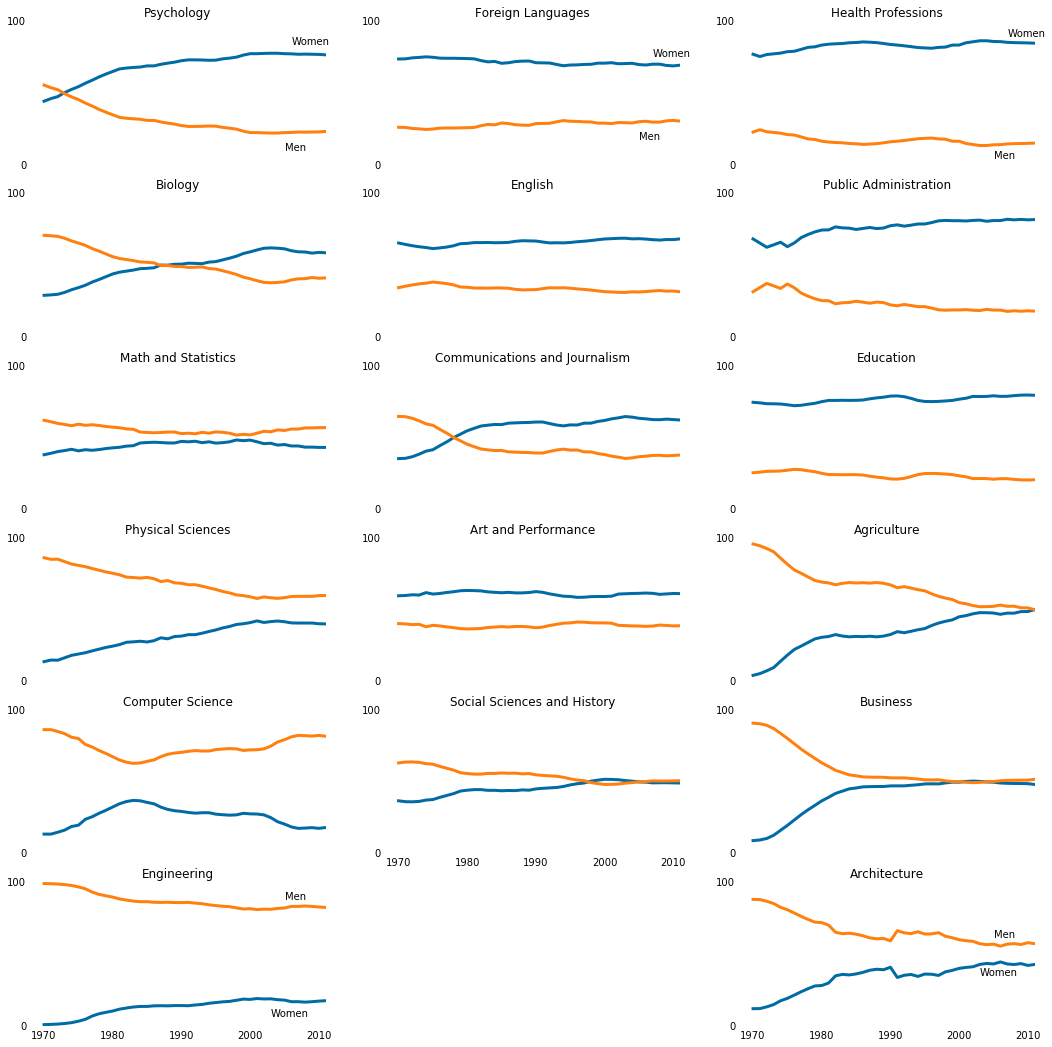

In [9]:
fig = plt.figure(figsize=(18, 18))

for sp in range(0,18,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int(sp/3)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(stem_cats[index])
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_yticks([0,100])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    
    if index == 0:
        ax.text(2006, 84, 'Women')
        ax.text(2005, 10, 'Men')
    elif index == 5:
        ax.text(2005, 88, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom = 'on')

for sp in range(1,15,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int((sp-1)/3)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(lib_arts_cats[index])
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_yticks([0,100])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    
    if index == 0:
        ax.text(2007, 76, 'Women')
        ax.text(2005, 18, 'Men')
    if index == 4:
        ax.tick_params(labelbottom = 'on')

for sp in range(2,18,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int((sp-2)/3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(other_cats[index])
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_yticks([0,100])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    
    if index == 0:
        ax.text(2007, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 35, 'Women')
        ax.tick_params(labelbottom = 'on')
plt.show()

Since this change makes it hard to tell which majors have close to a 50/50 split between women and men, I will add a line at the 50% mark to provide additional visual cues. I will also export this final plot as an image file.

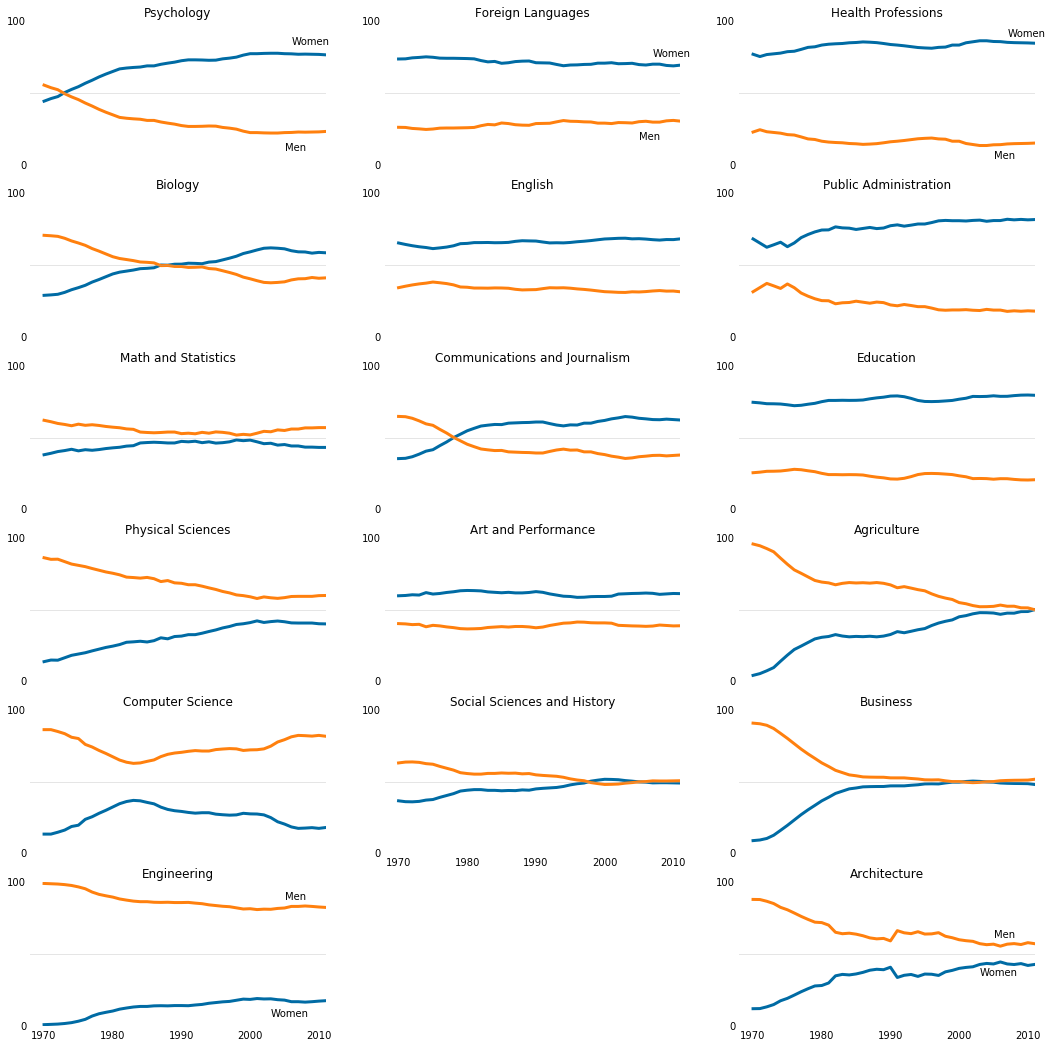

In [13]:
fig = plt.figure(figsize=(18, 18))
cb_gray = (171/255, 171/255, 171/255)

for sp in range(0,18,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int(sp/3)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(stem_cats[index])
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_yticks([0,100])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    ax.axhline(50, c = cb_gray, alpha = 0.3)
    
    if index == 0:
        ax.text(2006, 84, 'Women')
        ax.text(2005, 10, 'Men')
    elif index == 5:
        ax.text(2005, 88, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom = 'on')

for sp in range(1,15,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int((sp-1)/3)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(lib_arts_cats[index])
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_yticks([0,100])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    ax.axhline(50, c = cb_gray, alpha = 0.3)
    
    if index == 0:
        ax.text(2007, 76, 'Women')
        ax.text(2005, 18, 'Men')
    if index == 4:
        ax.tick_params(labelbottom = 'on')

for sp in range(2,18,3):
    ax = fig.add_subplot(6,3,sp+1)
    index = int((sp-2)/3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(other_cats[index])
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_yticks([0,100])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = 'off')
    ax.axhline(50, c = cb_gray, alpha = 0.3)
    
    if index == 0:
        ax.text(2007, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 35, 'Women')
        ax.tick_params(labelbottom = 'on')
plt.savefig('gender_degrees.png')
plt.show()

After cleaning up the plots, the data-ink ratio is much better so that viewers can quickly and easily make comparisons between majors. For STEM degrees, women have a clear majority in Psychology and a slight majority for Biology. For Math and Physical Sciences, there is pretty close to a 50/50 split. The only STEM majors where men have a clear majority are Computer Science and Engineering. 

For liberal arts and other majors, women either have the majority or it is a 50/50 split, with the exception of Architecture.

Based on this data, I cannot clearly conclude that there is a gender gap in STEM fields. It actually appears to be pretty evenly split, with 2 STEM majors having a majority of women, 2 having a 50/50 split, and 2 having a majority of men. If anything, the gender gap seems to be more in the technology and engineering portion of STEM as opposed to the science and math portion of STEM. We could examine more detailed data on particular engineering and technology degrees to see if this trend holds true even for all specialties within those fields.